x.shape, y.shape, t.shape = (101,) (121,) (316,)
X.shape, Y.shape, T.shape = (121, 101, 316) (121, 101, 316) (121, 101, 316)


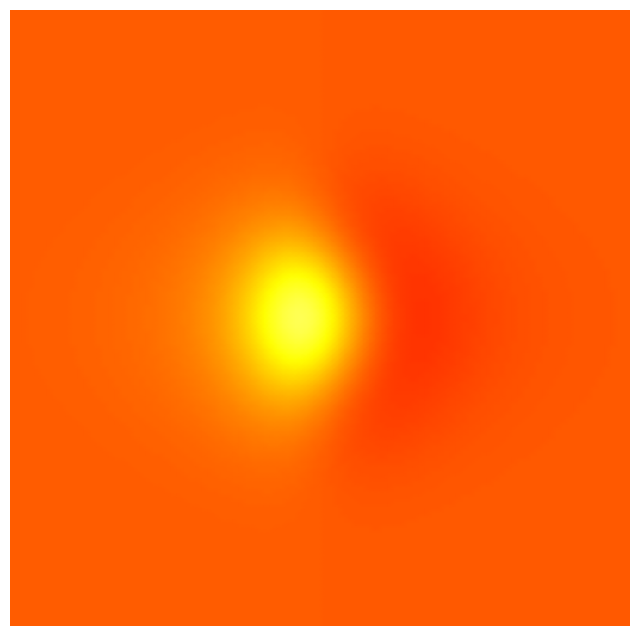

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import animation, rc
from IPython.display import HTML
# %matplotlib inline

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

x = np.arange(-5,5.01,0.1)
y = np.arange(-6,6.01,0.1)
t = np.arange(0,10*np.pi+0.1,0.1)

print( "x.shape, y.shape, t.shape = ", end="")
print( x.shape, y.shape, t.shape)

X,Y,T = np.meshgrid(x,y,t)

print( "X.shape, Y.shape, T.shape = ", end="")
print( X.shape, Y.shape, T.shape)

A = np.exp(-(X**2 + 0.5*Y**2)) * np.cos(2*T) + \
    (np.divide(np.ones_like(X),np.cosh(X)) * np.tanh(X) * np.exp(-0.2*Y**2)) * np.sin(T)

fig = plt.figure()
plt.axis('off')

# Thus plots the 2D slice at the first time step. 
# A represents - the value of the function at each (x,y) point for each time step.
# For example this prints the '100th' time step - 
pcm = plt.pcolormesh(X[:,:,99],Y[:,:,99],A[:,:,99],vmin=-1,vmax=1,shading='gouraud')

    
# def init():
#     pcm.set_array(np.array([]))
#     return pcm

# def animate(iter):
#     pcm.set_array(A[:-1,:-1,iter].ravel())
# #     print('Frame ' + str(iter))
#     return pcm

# anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(t),interval=50,blit=False,repeat=False)
# HTML(anim.to_jshtml())

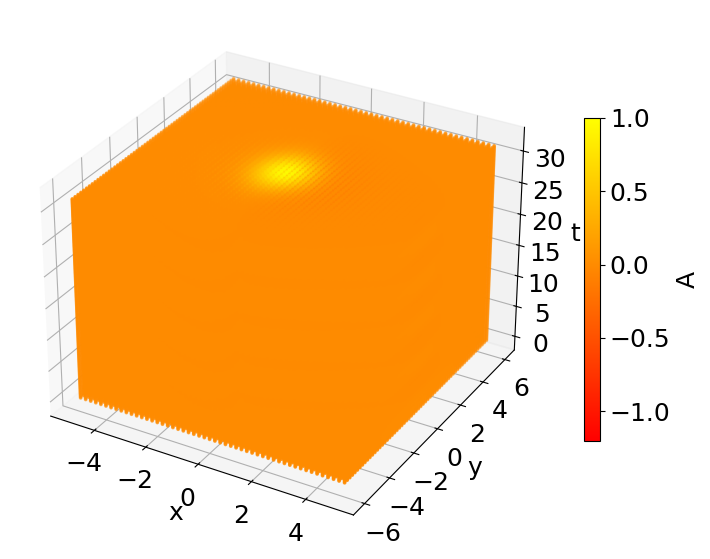

In [30]:
# 3D scatter of (x, y, t) colored by A, with subsampling for speed.
step_xy = 2
step_t = 2
Xs = X[::step_xy, ::step_xy, ::step_t]
Ys = Y[::step_xy, ::step_xy, ::step_t]
Ts = T[::step_xy, ::step_xy, ::step_t]
As = A[::step_xy, ::step_xy, ::step_t]

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(Xs.ravel(), Ys.ravel(), Ts.ravel(), c=As.ravel(), cmap="autumn", s=3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("t")
fig.colorbar(sc, ax=ax, shrink=0.6, label="A")
plt.show()

The 3D plot shows that the high values are in the center of the cuboid represented by the ranges (x,y,t).
This color also shows up on the 2 D slices

Notes*

np.meshgrid builds a 3D grid and then evaluates a time‑varying field on that grid.

np.meshgrid(x, y, t) takes the 1D arrays and returns 3D arrays X, Y, T where each element is the coordinate value at that grid point. Shapes are (len(y), len(x), len(t)) in the default indexing='xy' mode.
The print lines just show those shapes.
A = ... computes a 3D array on that grid:
First term: a Gaussian in X and Y multiplied by cos(2T) (oscillates in time).
Second term: a localized X profile (from tanh/cosh) times a Gaussian in Y, multiplied by sin(T) (another time oscillation).
So A[y, x, t] is the value of that synthetic field at each spatial point (x, y) and time t.

/tmp/ipykernel_4315/684238526.py:8: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,8*(j+1)-3],vmin=-1,vmax=1,shading='interp')


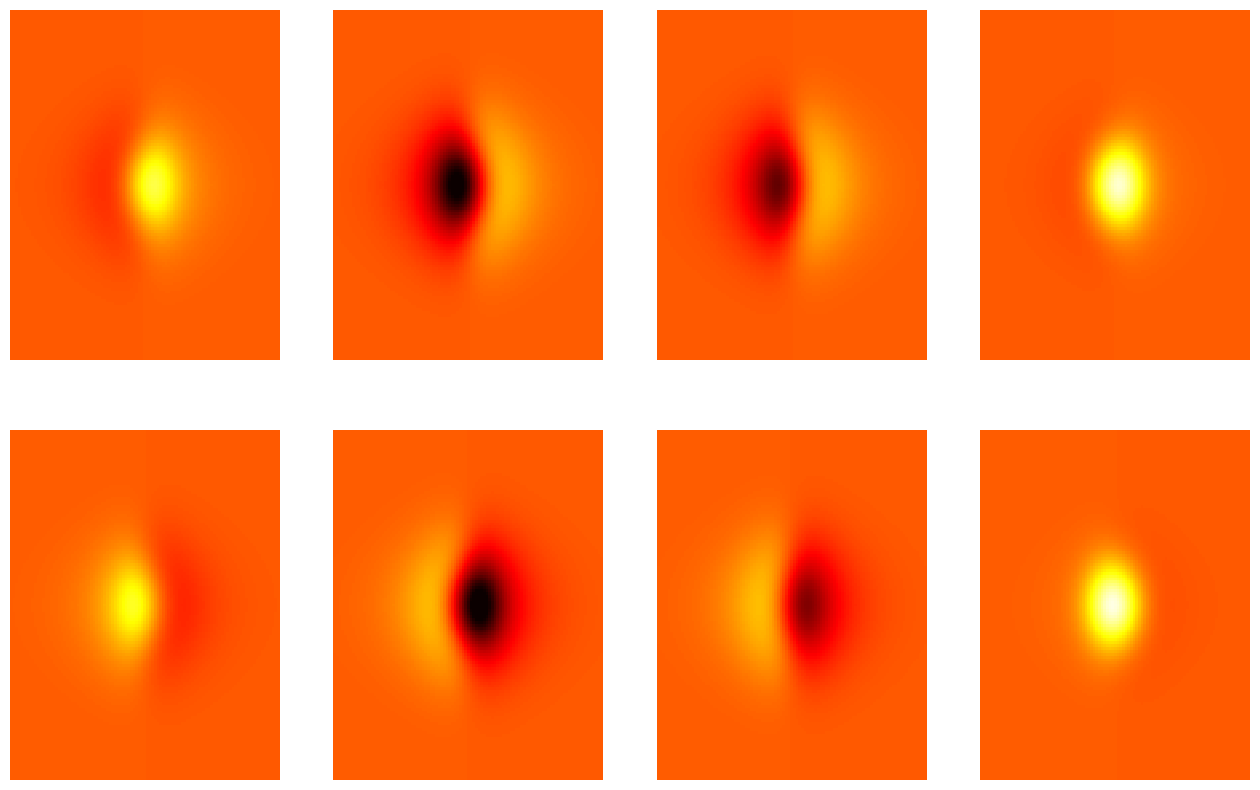

In [3]:


plt.rcParams['figure.figsize'] = [16,10]

fig, axs = plt.subplots(2,4)
axs = axs.reshape(-1)

for j in range(8):
    plt.sca(axs[j])
    plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,8*(j+1)-3],vmin=-1,vmax=1,shading='interp')
    axs[j].axis('off')
    plt.set_cmap('hot')



A1.shape, A2.shape, A3.shape = (121, 2) (101, 2) (316, 2)


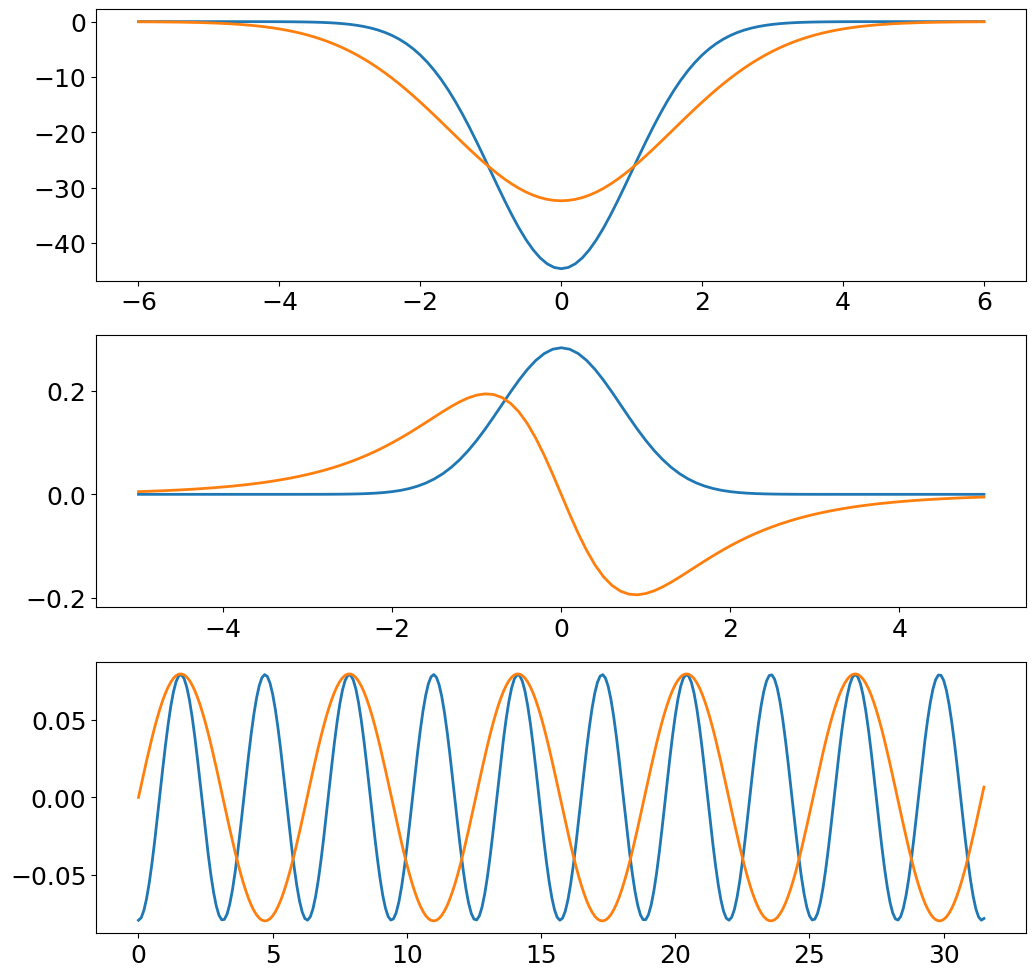

In [31]:
# Tensor factorization method requires the TensorLy module,
# available at http://tensorly.org/stable/installation.html

from tensorly.decomposition import parafac
plt.rcParams['figure.figsize'] = [12,12]


weights, factors = parafac(A,2)
A1,A2,A3 = factors

print( "A1.shape, A2.shape, A3.shape = ", end="")
print( A1.shape, A2.shape, A3.shape)

fig, axs = plt.subplots(3,1)
axs[0].plot(y,A1,linewidth=2)
axs[1].plot(x,A2,linewidth=2)
axs[2].plot(t,A3,linewidth=2)
plt.show()

A1.shape, A2.shape, A3.shape = (121, 2) (101, 2) (316, 2)


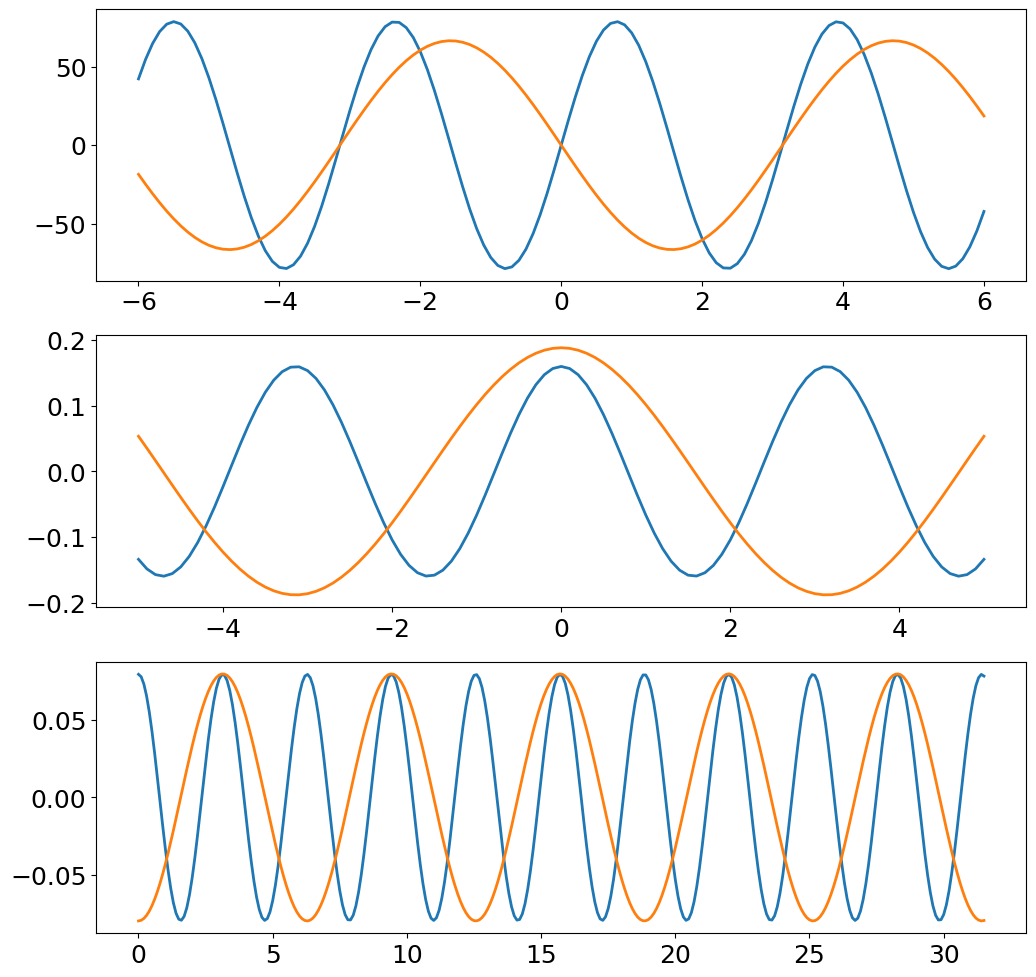

In [33]:
A = np.cos(X) * np.sin(Y) * np.cos(T) + np.cos(2*X) * np.sin(2*Y) * np.cos(2*T)

plt.rcParams['figure.figsize'] = [12,12]


weights, factors = parafac(A,2)
A1,A2,A3 = factors

print( "A1.shape, A2.shape, A3.shape = ", end="")
print( A1.shape, A2.shape, A3.shape)

fig, axs = plt.subplots(3,1)
axs[0].plot(y,A1,linewidth=2)
axs[1].plot(x,A2,linewidth=2)
axs[2].plot(t,A3,linewidth=2)
plt.show()

A1.shape, A2.shape, A3.shape = (121, 2) (101, 2) (316, 2)


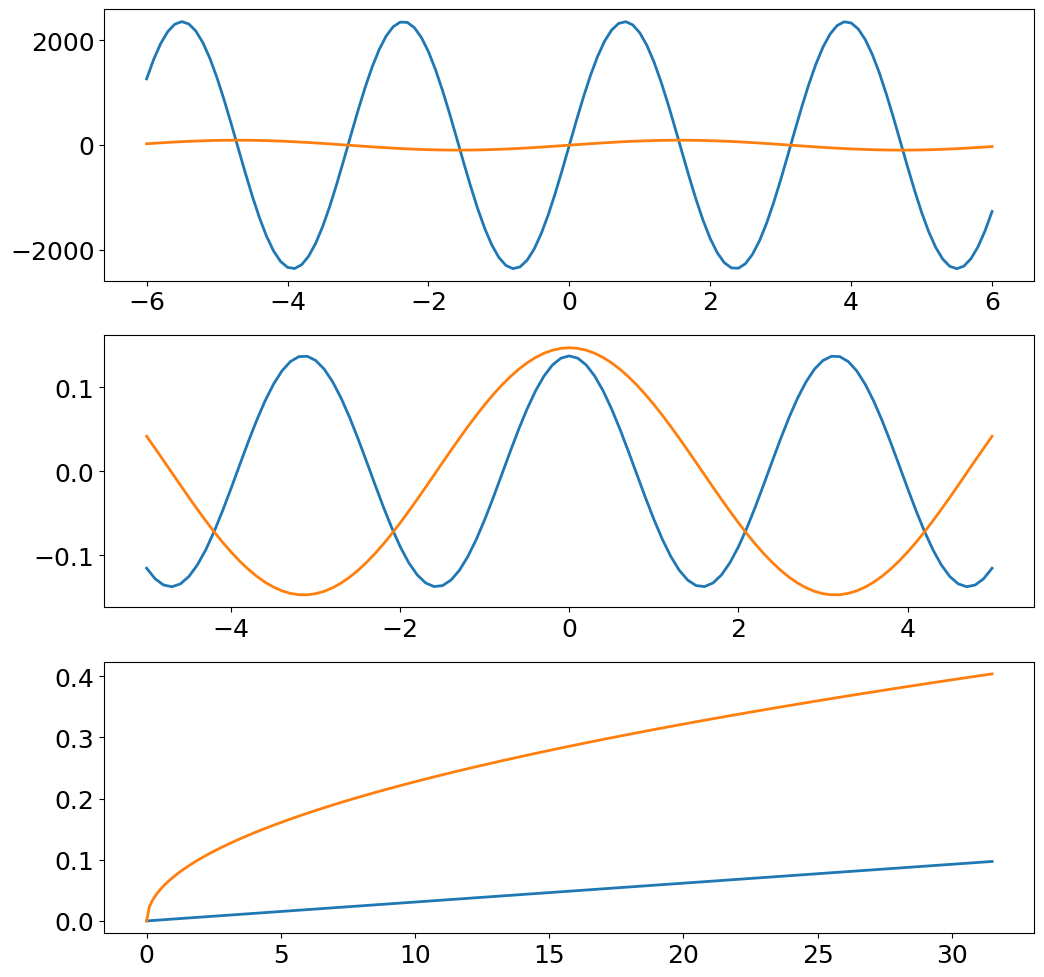

In [35]:
A = (np.cos(X) * np.sin(Y) * np.sqrt(T) )+ (np.cos(2*X) * np.sin(2*Y) * T)

plt.rcParams['figure.figsize'] = [12,12]


weights, factors = parafac(A,2)
A1,A2,A3 = factors

print( "A1.shape, A2.shape, A3.shape = ", end="")
print( A1.shape, A2.shape, A3.shape)

fig, axs = plt.subplots(3,1)
axs[0].plot(y,A1,linewidth=2)
axs[1].plot(x,A2,linewidth=2)
axs[2].plot(t,A3,linewidth=2)
plt.show()

The issue is that `A` is **not separable** into a product of independent X, Y, and T functions because of the `√T` and `T` terms mixed with the spatial modes.

PARAFAC (CP decomposition) assumes:

$$A \approx \sum_r a_r(x) \cdot b_r(y) \cdot c_r(t)$$

But your formula is:

$$A = \cos(X) \sin(Y) \sqrt{T} + \cos(2X) \sin(2Y) \, T$$

The first term has $\sqrt{T}$ and the second has $T$—these time dependencies **don't factorize cleanly** with the spatial modes, so PARAFAC can't recover the exact X modes.

**To fix it**, use separable time functions (like `cos(T)` and `cos(2*T)`) so each term is a true rank-1 product:

